In [59]:
%reset -f

import pandas as pd

# First for DK1
area = "DK1"  #DK1 is Vestdanmark and DK2 is Østdanmark

# Load the provided CSV file
file_path = f'Data/{area}spot.csv'

# Load the CSV into a DataFrame
spot_price = pd.read_csv(file_path, delimiter=';')

DK1_spot = spot_price[['HourUTC', 'SpotPriceDKK']].rename(columns={'SpotPriceDKK': 'DK1_spot'})

# Then for DK2
area = "DK2"  #DK1 is Vestdanmark and DK2 is Østdanmark

# Load the provided CSV file
file_path = f'Data/{area}spot.csv'

# Load the CSV into a DataFrame
spot_price = pd.read_csv(file_path, delimiter=';')

DK2_spot = spot_price[['HourUTC', 'SpotPriceDKK']].rename(columns={'SpotPriceDKK': 'DK2_spot'})

# Merge DK1 and DK2 spot prices
spot_prices = pd.merge(DK1_spot, DK2_spot, on='HourUTC')
spot_prices['HourUTC'] = pd.to_datetime(spot_prices['HourUTC']).dt.strftime('%Y-%m-%d %H:%M:%S')
spot_prices = spot_prices.rename(columns={'HourUTC': 'DATE'})

spot_prices['DK1_spot'] = spot_prices['DK1_spot'].str.replace(',', '.').astype(float)
spot_prices['DK2_spot'] = spot_prices['DK2_spot'].str.replace(',', '.').astype(float)

# Load weather data
years = list(range(2014, 2024 + 1))

# Load and append all the CSVs into one dataframe using forward slashes
weather_df = pd.concat([pd.read_csv(f'Data/{year}.csv') for year in years])

weather_df['observed'] = pd.to_datetime(weather_df['observed']).dt.strftime('%Y-%m-%d %H:%M:%S')
weather_df = weather_df.rename(columns={'observed': 'DATE'})

# Merge again
merged_df = pd.merge(spot_prices, weather_df, left_on='DATE', right_on='DATE')

# Order columns alphabetically, then sort by DATE
merged_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
merged_df = merged_df.sort_values(by='DATE')

# Set the DATE column as the index
merged_df = merged_df.set_index('DATE')

merged_df


,DK1_spot,DK2_spot,sun_06019,sun_06031,sun_06041,sun_06056,sun_06058,sun_06065,sun_06068,sun_06069,...,wind_06170,wind_06174,wind_06180,wind_06181,wind_06183,wind_06186,wind_06188,wind_06190,wind_06193,wind_06197
DATE,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,96.669998,96.669998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.7,4.7,6.7,4.2,9.5,NaN,3.0,7.2,5.4,2.6
2014-01-01 01:00:00,90.180000,90.180000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.7,4.3,6.7,3.6,10.8,NaN,3.1,7.2,6.4,3.0
2014-01-01 02:00:00,87.269997,87.269997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.2,5.6,6.2,4.8,10.9,NaN,3.8,7.7,5.5,4.2
2014-01-01 03:00:00,86.970001,86.970001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.2,4.4,7.7,5.0,11.8,NaN,2.9,7.2,1.9,4.2
2014-01-01 04:00:00,84.660004,84.660004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.7,5.9,9.3,4.3,13.8,NaN,2.9,8.2,0.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-05 17:00:00,380.480011,380.480011,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,...,5.1,4.5,6.2,2.8,NaN,NaN,4.2,7.2,5.9,6.9
2024-09-05 18:00:00,340.489990,340.489990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,4.1,3.4,5.1,2.2,NaN,NaN,4.2,6.7,5.7,7.6
2024-09-05 19:00:00,297.820007,297.820007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1,4.8,5.7,2.1,NaN,NaN,3.9,7.7,6.0,7.1


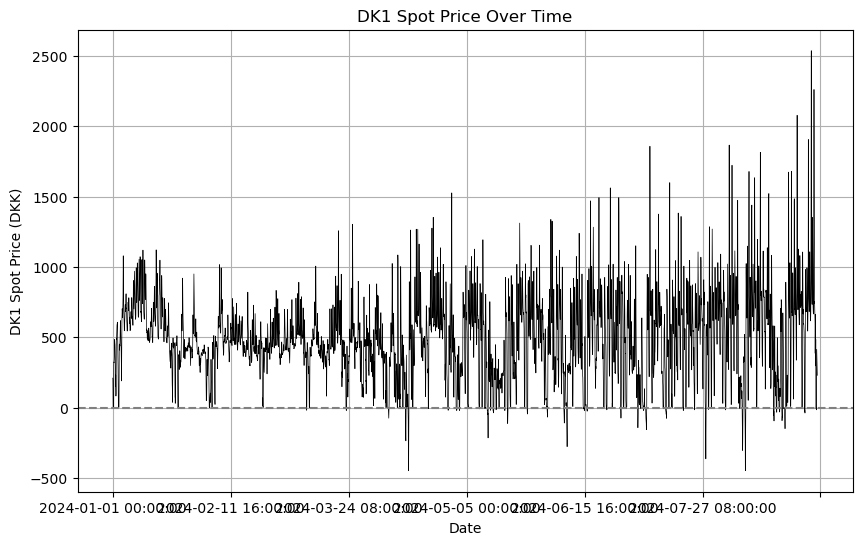

In [77]:
import matplotlib.pyplot as plt

filtered_df = merged_df[merged_df.index >= '2024-01-01']

# Plot DK1_spot with black color, smaller line thickness, and x-line at y=0
plt.figure(figsize=(10,6))
filtered_df['DK1_spot'].plot(color='black', linewidth=0.5)  # Black line with smaller thickness

plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0

plt.title('DK1 Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('DK1 Spot Price (DKK)')
plt.grid(True)
plt.show()


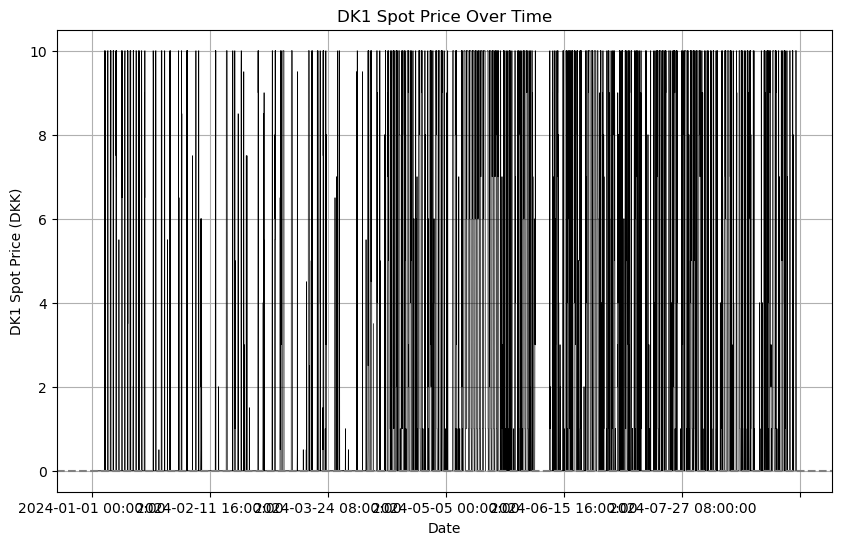

In [79]:
import matplotlib.pyplot as plt

filtered_df = merged_df[merged_df.index >= '2024-01-01']

# Plot DK1_spot with black color, smaller line thickness, and x-line at y=0
plt.figure(figsize=(10,6))
filtered_df['sun_06031'].plot(color='black', linewidth=0.5)  # Black line with smaller thickness

plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0

plt.title('DK1 Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('DK1 Spot Price (DKK)')
plt.grid(True)
plt.show()
